In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# This is to supress the warning messages
import warnings
warnings.filterwarnings('ignore')

In [315]:
df = pd.read_csv(r"C:\Users\Owner\Downloads\Statistics\CPSData.csv")
df = df.dropna().reset_index(drop=True)

In [316]:
df_National = df[(df['EmploymentStatus']=='Unemployed')].reset_index(drop=True)
df_National.head()

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry
0,3,South,Alabama,13820.0,21,Never Married,Male,High school,Black,0,57,"Citizen, Native",Unemployed,Professional and business services
1,4,South,Alabama,13820.0,21,Never Married,Male,"Some college, no degree",Black,0,57,"Citizen, Native",Unemployed,Leisure and hospitality
2,1,South,Alabama,26620.0,27,Never Married,Female,Associate degree,Multiracial,0,57,"Citizen, Native",Unemployed,Trade
3,2,South,Alabama,13820.0,40,Divorced,Female,Bachelor's degree,White,0,57,"Citizen, Native",Unemployed,Educational and health services
4,3,South,Alabama,13820.0,35,Never Married,Male,No high school diploma,White,0,57,"Citizen, Native",Unemployed,Leisure and hospitality


In [317]:
df_National['Sex'].replace(['Male','Female'],[0,1],inplace=True)

In [318]:
#Analysis of Numerical Columns
num_df = df_National.select_dtypes(exclude = 'object').copy()
num_df.head()

,PeopleInHousehold,MetroAreaCode,Age,Sex,Hispanic,CountryOfBirthCode
0,3,13820.0,21,0,0,57
1,4,13820.0,21,0,0,57
2,1,26620.0,27,1,0,57
3,2,13820.0,40,1,0,57
4,3,13820.0,35,0,0,57


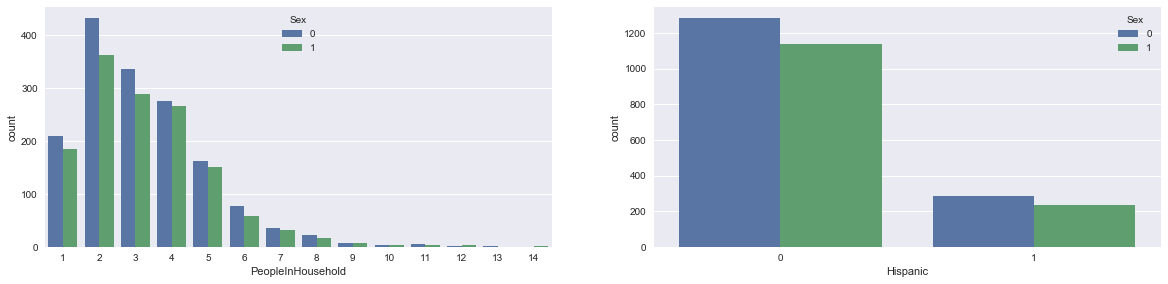

In [319]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1) 
sns.countplot(data = df_National, x = 'PeopleInHousehold', ax = ax1,hue='Sex')

ax1 = fig.add_subplot(3,2,2) 
sns.countplot(data = df_National, x = 'Hispanic', ax = ax1,hue='Sex')
plt.show()

In [320]:
#Analysis of Categorical Columns
cat_df = df_National.select_dtypes(include = 'object').copy()
cat_df.head()

,Region,State,Married,Education,Race,Citizenship,EmploymentStatus,Industry
0,South,Alabama,Never Married,High school,Black,"Citizen, Native",Unemployed,Professional and business services
1,South,Alabama,Never Married,"Some college, no degree",Black,"Citizen, Native",Unemployed,Leisure and hospitality
2,South,Alabama,Never Married,Associate degree,Multiracial,"Citizen, Native",Unemployed,Trade
3,South,Alabama,Divorced,Bachelor's degree,White,"Citizen, Native",Unemployed,Educational and health services
4,South,Alabama,Never Married,No high school diploma,White,"Citizen, Native",Unemployed,Leisure and hospitality


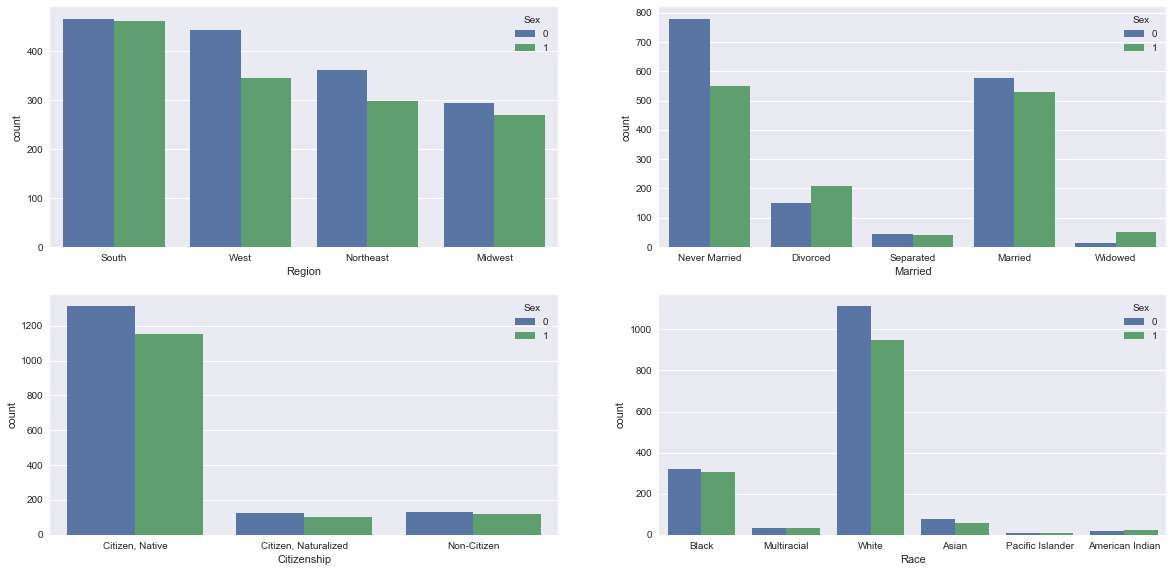

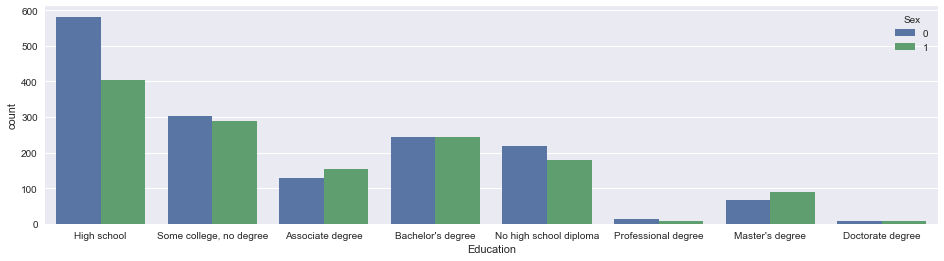

In [321]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1) 
sns.countplot(data = df_National, x = 'Region', ax = ax1,hue='Sex')

ax1 = fig.add_subplot(3,2,2) 
sns.countplot(data = df_National, x = 'Married', ax = ax1,hue='Sex')

ax1 = fig.add_subplot(3,2,3) 
sns.countplot(data = df_National, x = 'Citizenship', ax = ax1,hue='Sex')


ax1 = fig.add_subplot(3,2,4) 
sns.countplot(data = df_National, x = 'Race', ax = ax1,hue='Sex')

plt.show()
plt.figure(figsize=(16,4))
sns.countplot(data = df_National, x = 'Education', hue='Sex')
plt.show()

In [322]:
df_National.corr()

,PeopleInHousehold,MetroAreaCode,Age,Sex,Hispanic,CountryOfBirthCode
PeopleInHousehold,1.000000,-0.026787,-0.284486,0.007935,0.219188,0.138480
MetroAreaCode,-0.026787,1.000000,0.031737,0.002856,-0.015511,0.038384
Age,-0.284486,0.031737,1.000000,0.029174,-0.117916,0.073822
Sex,0.007935,0.002856,0.029174,1.000000,-0.013670,-0.012251
Hispanic,0.219188,-0.015511,-0.117916,-0.013670,1.000000,0.324271
CountryOfBirthCode,0.138480,0.038384,0.073822,-0.012251,0.324271,1.000000


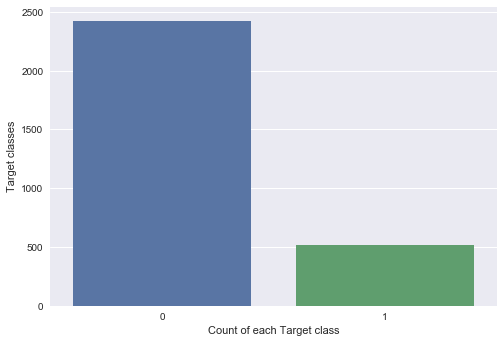

In [323]:
# Check distribution of target class
sns.countplot(x=df_National['Hispanic'] ,data=df_National)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [324]:
#Calculating Weight of Evidence and Information Value for Feature Selection
def get_IV(df, feature, target):
    lst = []
    
    unique_values = df[feature].unique()
    for val in unique_values:
        lst.append([feature,                                                        # Feature name
                    val,                                                            # Value of a feature (unique)
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]   # Bad  (Fraud == 1)
                   ])
 
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'Good', 'Bad'])

        
    total_bad = df[df[target] == 1].count()[feature]
    total_good = df.shape[0] - total_bad
    
    data['Distribution Good'] = data['Good']/ total_good
    data['Distribution Bad'] = data['Bad'] / total_bad
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    iv = data['IV'].sum()
    WoE = data['WoE'].sum()

    return iv, data

In [325]:
df_National_copy = df_National.copy()
final_iv_values = {}

for i in cat_df:
    IV, Data = get_IV(df_National,i,'Hispanic')
    final_iv_values[i] = IV
    for j in range(len(Data)):
        df_National_copy[i] = df_National_copy[i].replace([Data['Value'][j]], Data['WoE'][j])
    
df_National_copy.head()

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry
0,3,0.145954,1.956063,13820.0,21,-0.028069,0,-0.115635,1.520941,0,57,0.378809,0.0,0.003906
1,4,0.145954,1.956063,13820.0,21,-0.028069,0,0.247385,1.520941,0,57,0.378809,0.0,-0.021979
2,1,0.145954,1.956063,26620.0,27,-0.028069,1,0.353969,0.200021,0,57,0.378809,0.0,0.017700
3,2,0.145954,1.956063,13820.0,40,0.274380,1,0.649954,-0.296709,0,57,0.378809,0.0,0.265108
4,3,0.145954,1.956063,13820.0,35,-0.028069,0,-0.965955,-0.296709,0,57,0.378809,0.0,-0.021979


In [326]:
#Storing features and their IV values respectively
final_iv_values = {}
for i in df_National_copy.columns:
    IV, Data = get_IV(df_National_copy,i,'Hispanic')
    final_iv_values[i] = IV
    
#Sorting the the features in descending order of their IV values.
features = {}
for w in sorted(final_iv_values, key=final_iv_values.get, reverse=True):
    features[w] = final_iv_values[w]

    
#Selecting top 20 features for further analyses. 
newDict = dict()
i = 0 #Max Features
# Iterate over all the items in dictionary and filter items which has even keys
for (key, value) in features.items():
   # Check if key is even then add pair to new dictionary
    if value > 0.02 and value < 0.5 and i<5:
            newDict[key] = value
            i= i + 1
print(newDict)

{'Race': 0.4570400419852218, 'PeopleInHousehold': 0.3283717456365966, 'Education': 0.30543471308177317, 'Age': 0.2593061277133716, 'Region': 0.2317369284368035}


In [327]:
#Creating the list of names of top 5 features 
feature_list = []
for i in newDict:
    feature_list.append(i)

if 'Hispanic' not in feature_list:
    feature_list.append('Hispanic')

dataframe = df_National_copy[feature_list]
dataframe.head()

,Race,PeopleInHousehold,Education,Age,Region,Hispanic
0,1.520941,3,-0.115635,21,0.145954,0
1,1.520941,4,0.247385,21,0.145954,0
2,0.200021,1,0.353969,27,0.145954,0
3,-0.296709,2,0.649954,40,0.145954,0
4,-0.296709,3,-0.965955,35,0.145954,0


In [328]:
dataframe.isnull().sum()

Race                 0
PeopleInHousehold    0
Education            0
Age                  0
Region               0
Hispanic             0
dtype: int64

In [329]:
#Adding Output Column in x and then removing for Train(X) and y='Output'

X = dataframe.drop('Hispanic', axis=1) # input categorical features
y = dataframe['Hispanic'] # target variable

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score,plot_roc_curve

In [333]:
#Logistic Regression Model Fitting

log_model = LogisticRegression(max_iter=50)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print("Classification Report: \n",classification_report(y_test, log_pred))
print("\n Confusion Matrix: \n",confusion_matrix(y_test, log_pred))
print("\n Accuracy Score: ",round(accuracy_score(y_test, log_pred),2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       245
           1       0.93      0.28      0.43        50

    accuracy                           0.87       295
   macro avg       0.90      0.64      0.68       295
weighted avg       0.88      0.87      0.84       295


 Confusion Matrix: 
 [[244   1]
 [ 36  14]]

 Accuracy Score:  0.87


In [334]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, log_pred)

In [335]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

In [336]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, log_pred)
auc_score1

0.6379591836734694

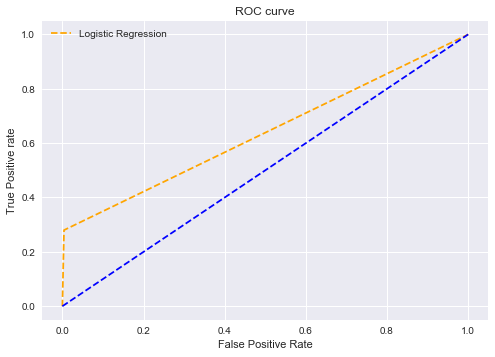

In [337]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

Feature: 0, Score: -1.09515
Feature: 1, Score: 0.23599
Feature: 2, Score: -0.98673
Feature: 3, Score: -0.01031
Feature: 4, Score: -0.94903


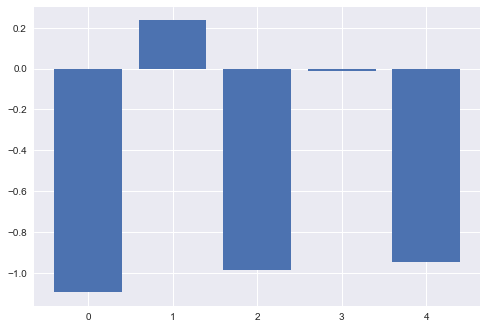

In [338]:
from matplotlib import pyplot

model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Handling Imablance DataSet

In [339]:
# Over sample the minority class 
from imblearn.over_sampling import SMOTE

ros = SMOTE(k_neighbors=10)
X_ros, y_ros = ros.fit_resample(X, y)



y_ros.value_counts()

0    2422
1    2422
Name: Hispanic, dtype: int64

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=1)

In [341]:
#Logistic Regression Model Fitting

log_model = LogisticRegression(max_iter=50)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print("Classification Report: \n",classification_report(y_test, log_pred))
print("\n Confusion Matrix: \n",confusion_matrix(y_test, log_pred))
print("\n Accuracy Score: ",round(accuracy_score(y_test, log_pred),2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       244
           1       0.70      0.71      0.71       241

    accuracy                           0.71       485
   macro avg       0.71      0.71      0.71       485
weighted avg       0.71      0.71      0.71       485


 Confusion Matrix: 
 [[170  74]
 [ 69 172]]

 Accuracy Score:  0.71
